In [1]:
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston, load_wine
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
wine = load_wine()

In [3]:
# Наименования признаков
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
# Размер выборки
wine.data.shape, wine.target.shape

((178, 13), (178,))

In [5]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data= pd.np.c_[wine['data'], wine['target']],
                     columns= list(wine['feature_names']) + ['target'])

In [6]:
# И выведем его статистические характеристики
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
# Разделение данных на обучающую и тестовую выборки
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=1)

In [8]:
# Размер обучающей выборки
wine_X_train.shape, wine_y_train.shape

((124, 13), (124,))

In [9]:
# Размер тестовой выборки
wine_X_test.shape, wine_y_test.shape

((54, 13), (54,))

In [62]:
# 4 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=3)
cl1_1.fit(wine_X_train, wine_y_train)
target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(54, array([0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 0]))

In [32]:
# 7 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=5)
cl1_2.fit(wine_X_train, wine_y_train)
target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(54, array([1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 0]))

In [63]:

# wine_y_test - эталонное значение классов из исходной (тестовой) выборки
# target* - предсказанное значение классов

# 3 ближайших соседа
accuracy_score(wine_y_test, target1_1)

0.7407407407407407

In [33]:
# 5 ближайших соседей
accuracy_score(wine_y_test, target1_2)

0.7037037037037037

In [35]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:pd.np.ndarray, target:int) -> pd.np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res
bin_wine_y_test = convert_target_to_binary(wine_y_test, 2)
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)
confusion_matrix(bin_wine_y_test, bin_target1_1, labels=[0, 1])

array([[36,  6],
       [ 6,  6]])

In [36]:
tn, fp, fn, tp = confusion_matrix(bin_wine_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(36, 6, 6, 6)

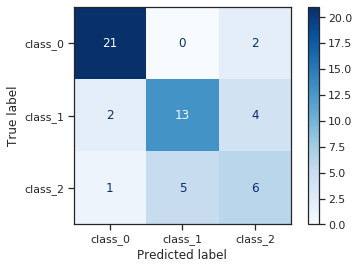

In [37]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Blues)

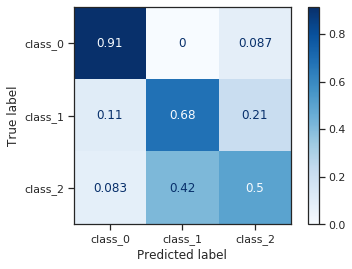

In [38]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Blues, 
                      normalize='true')

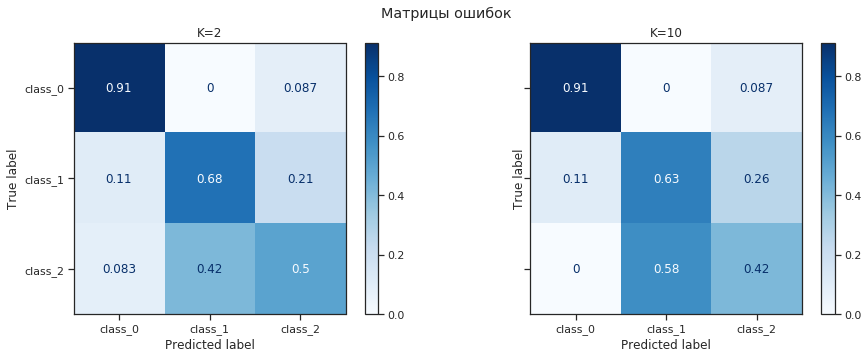

In [39]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')


In [40]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 3 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_1), recall_score(bin_wine_y_test, bin_target1_1)

(0.5, 0.5)

In [42]:
# Для 5 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_2), recall_score(bin_wine_y_test, bin_target1_2)


(0.4166666666666667, 0.4166666666666667)

In [43]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(wine_y_test, target1_1, average='micro')

0.7407407407407407

In [44]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(wine_y_test, target1_1, average='macro')

0.6990740740740741

In [45]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(wine_y_test, target1_1, average='weighted')

0.7379115226337448

In [46]:
classification_report(wine_y_test, target1_1, 
                      target_names=wine.target_names, output_dict=True)

{'class_0': {'precision': 0.875,
  'recall': 0.9130434782608695,
  'f1-score': 0.8936170212765957,
  'support': 23},
 'class_1': {'precision': 0.7222222222222222,
  'recall': 0.6842105263157895,
  'f1-score': 0.7027027027027027,
  'support': 19},
 'class_2': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 12},
 'accuracy': 0.7407407407407407,
 'macro avg': {'precision': 0.6990740740740741,
  'recall': 0.6990846681922197,
  'f1-score': 0.6987732413264328,
  'support': 54},
 'weighted avg': {'precision': 0.7379115226337448,
  'recall': 0.7407407407407407,
  'f1-score': 0.7389730155687603,
  'support': 54}}

In [47]:
fpr, tpr, thresholds = roc_curve(bin_wine_y_test, bin_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.14285714, 1.        ]),
 array([0. , 0.5, 1. ]),
 array([2, 1, 0]))

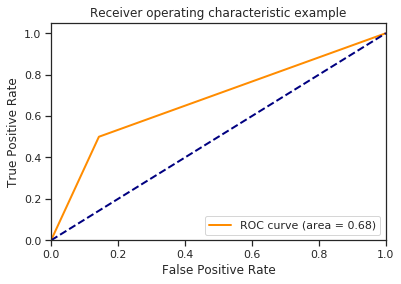

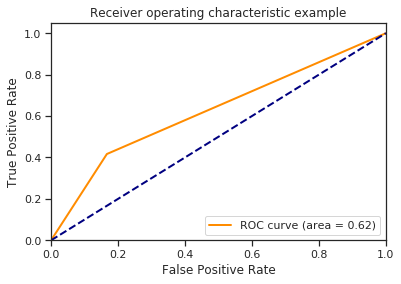

In [48]:

# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Для 3 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_1, pos_label=1, average='micro')

# Для 5 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_2, pos_label=1, average='micro')

In [49]:
wine_cross = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         wine.data, wine.target, cv=11)

In [50]:
wine_cross

array([0.58823529, 0.64705882, 0.6875    , 0.5625    , 0.5625    ,
       0.625     , 0.8125    , 0.6875    , 0.8125    , 0.75      ,
       0.75      ])

In [51]:
pd.np.mean(wine_cross)

0.68048128342246

In [52]:
wining = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

wine_cross = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        wine.data, wine.target, scoring=wining, 
                        cv=3, return_train_score=True)
wine_cross

{'fit_time': array([0.0082376 , 0.0005455 , 0.00053406]),
 'score_time': array([0.00567746, 0.00451016, 0.00416517]),
 'test_precision': array([0.48984127, 0.62317561, 0.70585516]),
 'train_precision': array([0.91000807, 0.8877454 , 0.85825075]),
 'test_recall': array([0.56666667, 0.6440678 , 0.72881356]),
 'train_recall': array([0.89830508, 0.87394958, 0.83193277]),
 'test_f1': array([0.51069094, 0.6198816 , 0.6798559 ]),
 'train_f1': array([0.89415947, 0.8703245 , 0.8181316 ])}

In [53]:
n_range = pd.np.array(range(5,30,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28, 29])}]

In [54]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_y_train)

CPU times: user 501 ms, sys: 0 ns, total: 501 ms
Wall time: 521 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])}],
             scoring='accuracy')

In [55]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00214839, 0.00094914, 0.00107455, 0.00067949, 0.000667  ,
        0.00067825, 0.00092387, 0.00088015, 0.00103855, 0.00099545,
        0.00100513, 0.00105572, 0.00115452, 0.00101171, 0.00098457,
        0.00101452, 0.00094767, 0.000776  , 0.00058112, 0.00051031,
        0.00048132, 0.00044899, 0.00046372, 0.0004117 , 0.00041552]),
 'std_fit_time': array([2.77346982e-03, 1.13756597e-04, 1.55855230e-04, 7.44411379e-05,
        8.77451116e-05, 1.46830883e-04, 4.14006157e-05, 1.55529312e-04,
        7.53005744e-05, 6.71374865e-05, 1.61864577e-04, 1.18935939e-04,
        2.03021203e-04, 5.38588784e-05, 7.12294169e-05, 1.69383633e-04,
        8.91534262e-05, 4.25189039e-05, 6.90343620e-05, 2.18735761e-05,
        3.09089804e-05, 1.38203829e-05, 2.44487762e-05, 9.03905175e-06,
        1.08184253e-05]),
 'mean_score_time': array([0.00246716, 0.00309262, 0.00321221, 0.00249381, 0.00220919,
        0.00245447, 0.00319571, 0.00286374, 0.00343766, 0.00324702,
        0.00

In [57]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=22)

In [58]:
# Лучшее значение метрики
clf_gs.best_score_

0.7500000000000001

In [59]:
clf_gs.best_params_


{'n_neighbors': 22}